# Indian State Wise COVID-19 Tracker 



In [ ]:
!pip install beautifulsoup4

ERROR: Could not install packages due to an EnvironmentError: ("Connection broken: ConnectionResetError(104, 'Connection reset by peer')", ConnectionResetError(104, 'Connection reset by peer'))



### Importing Required Libraries & Scraping the details from the website "covidindia.org"

In [1]:
import requests
import urllib.request
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://covidindia.org'
r = requests.get(url)
htmlContent = r.content
soup = BeautifulSoup(htmlContent, 'html.parser')

In [77]:
title = soup.title.text

### The state wise details(like active case, death and recovery) are present in the table tag of class given below

In [4]:
state_wise = soup.find('table', class_='tablepress tablepress-id-96 tablepress-responsive')

In [24]:
with open('COVID_India.csv' ,'w', newline='') as f:
  wr = csv.writer(f)
  wr.writerow(['State', 'Active case', 'Recovered', 'Death'])

  for state in state_wise.find_all('tbody'):
    rows = state.find_all('tr')
    for row in rows:
      name = row.find('td').text
      total_case = row.find('td', class_='column-2').text
      recover = row.find('td', class_='column-3').text
      dead = row.find('td', class_='column-4').text
      wr.writerow([name, total_case, recover, dead])

### Adding the scarped details into csv file

In [78]:
cols = ['State', 'Active case', 'Recovered', 'Death']
covid = pd.read_csv('COVID_India.csv', usecols=cols)
#print(covid)

### Bar graph of Active Case

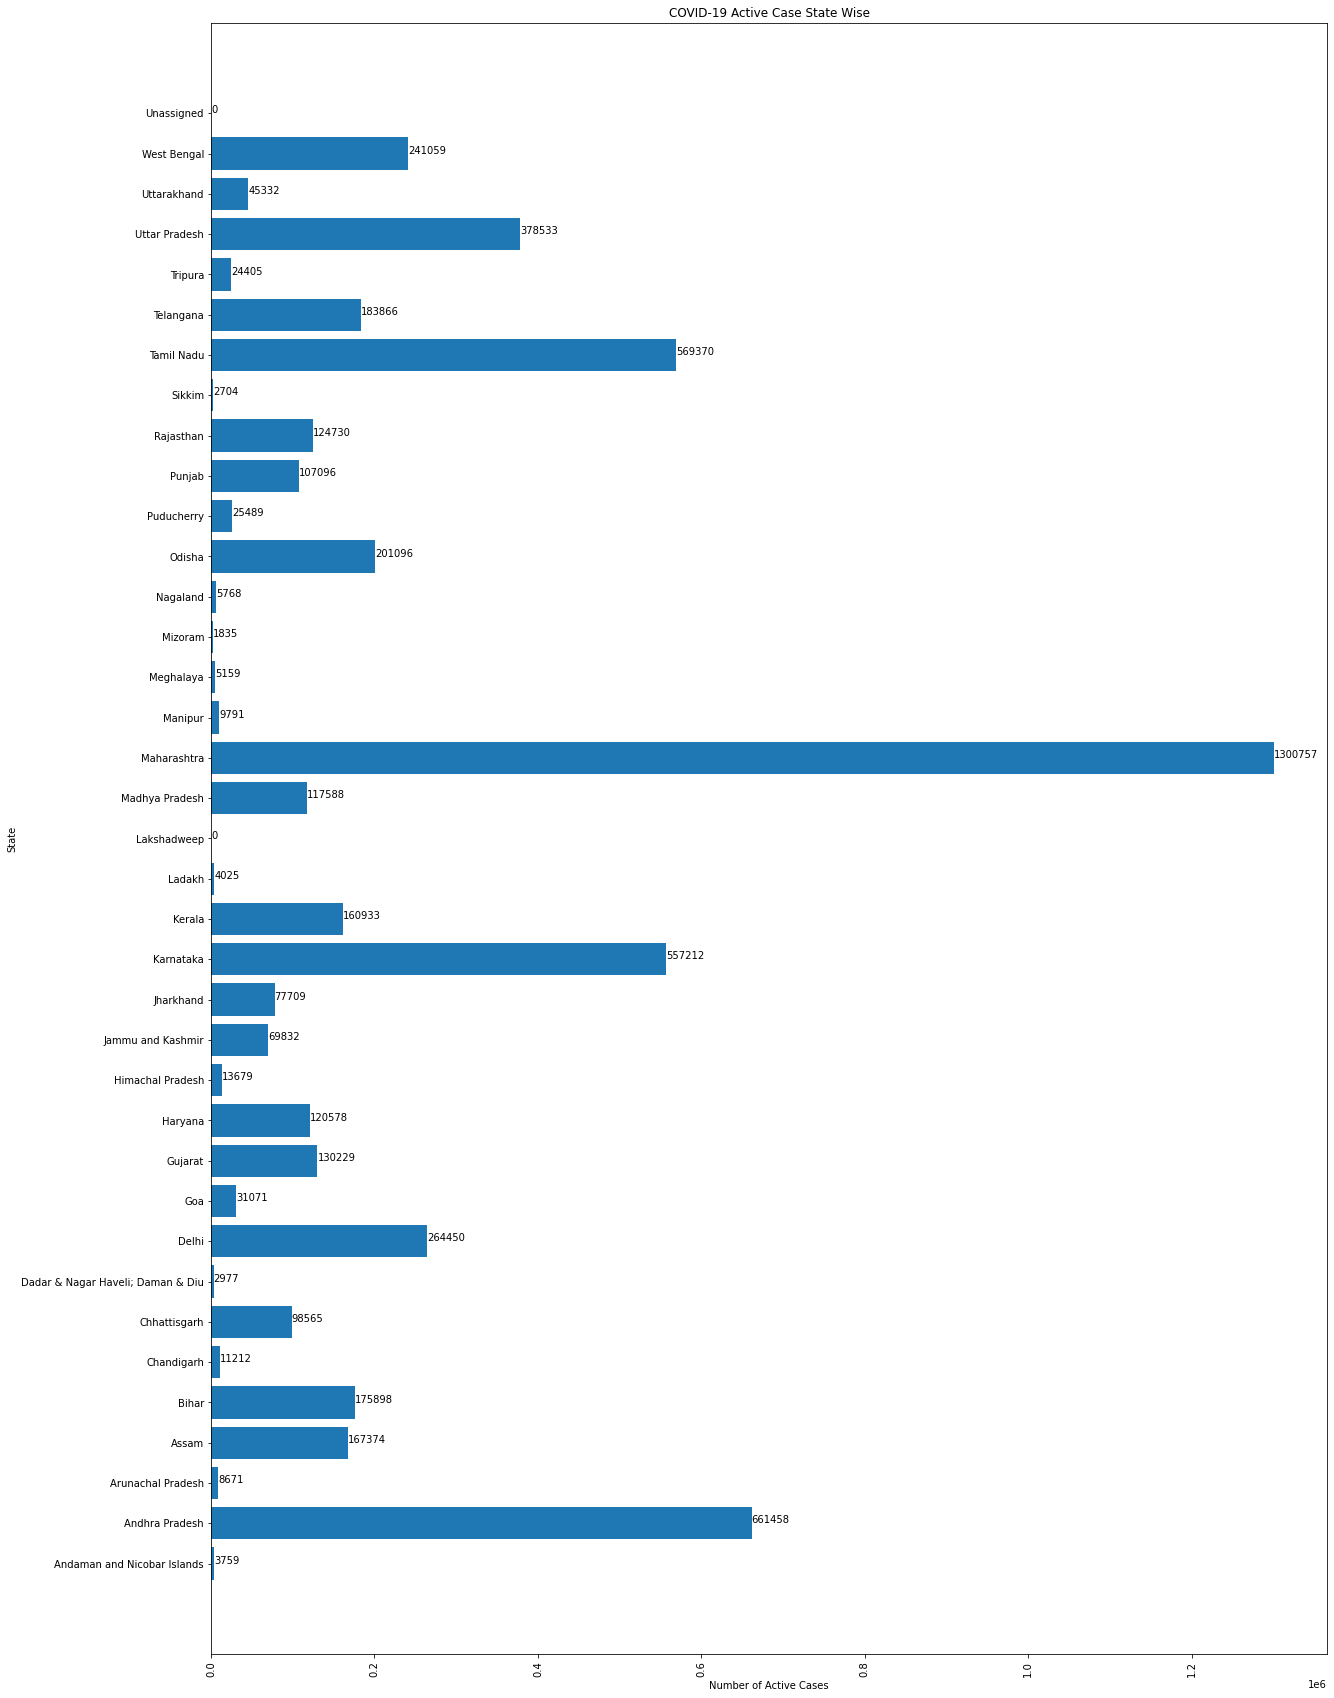

In [70]:
l = list()
for i in covid['Active case']:
  l.append(i)
  
plt.figure(figsize = (20, 30))
plt.barh(y=covid['State'], 
        width=covid['Active case'])
plt.xticks(rotation=90)
plt.xlabel('Number of Active Cases')
plt.ylabel('State')
plt.title('COVID-19 Active Case State Wise')
for index, value in enumerate(l):
    plt.text(value, index, str(value))
plt.show()


### Bar graph of number of people recovered 

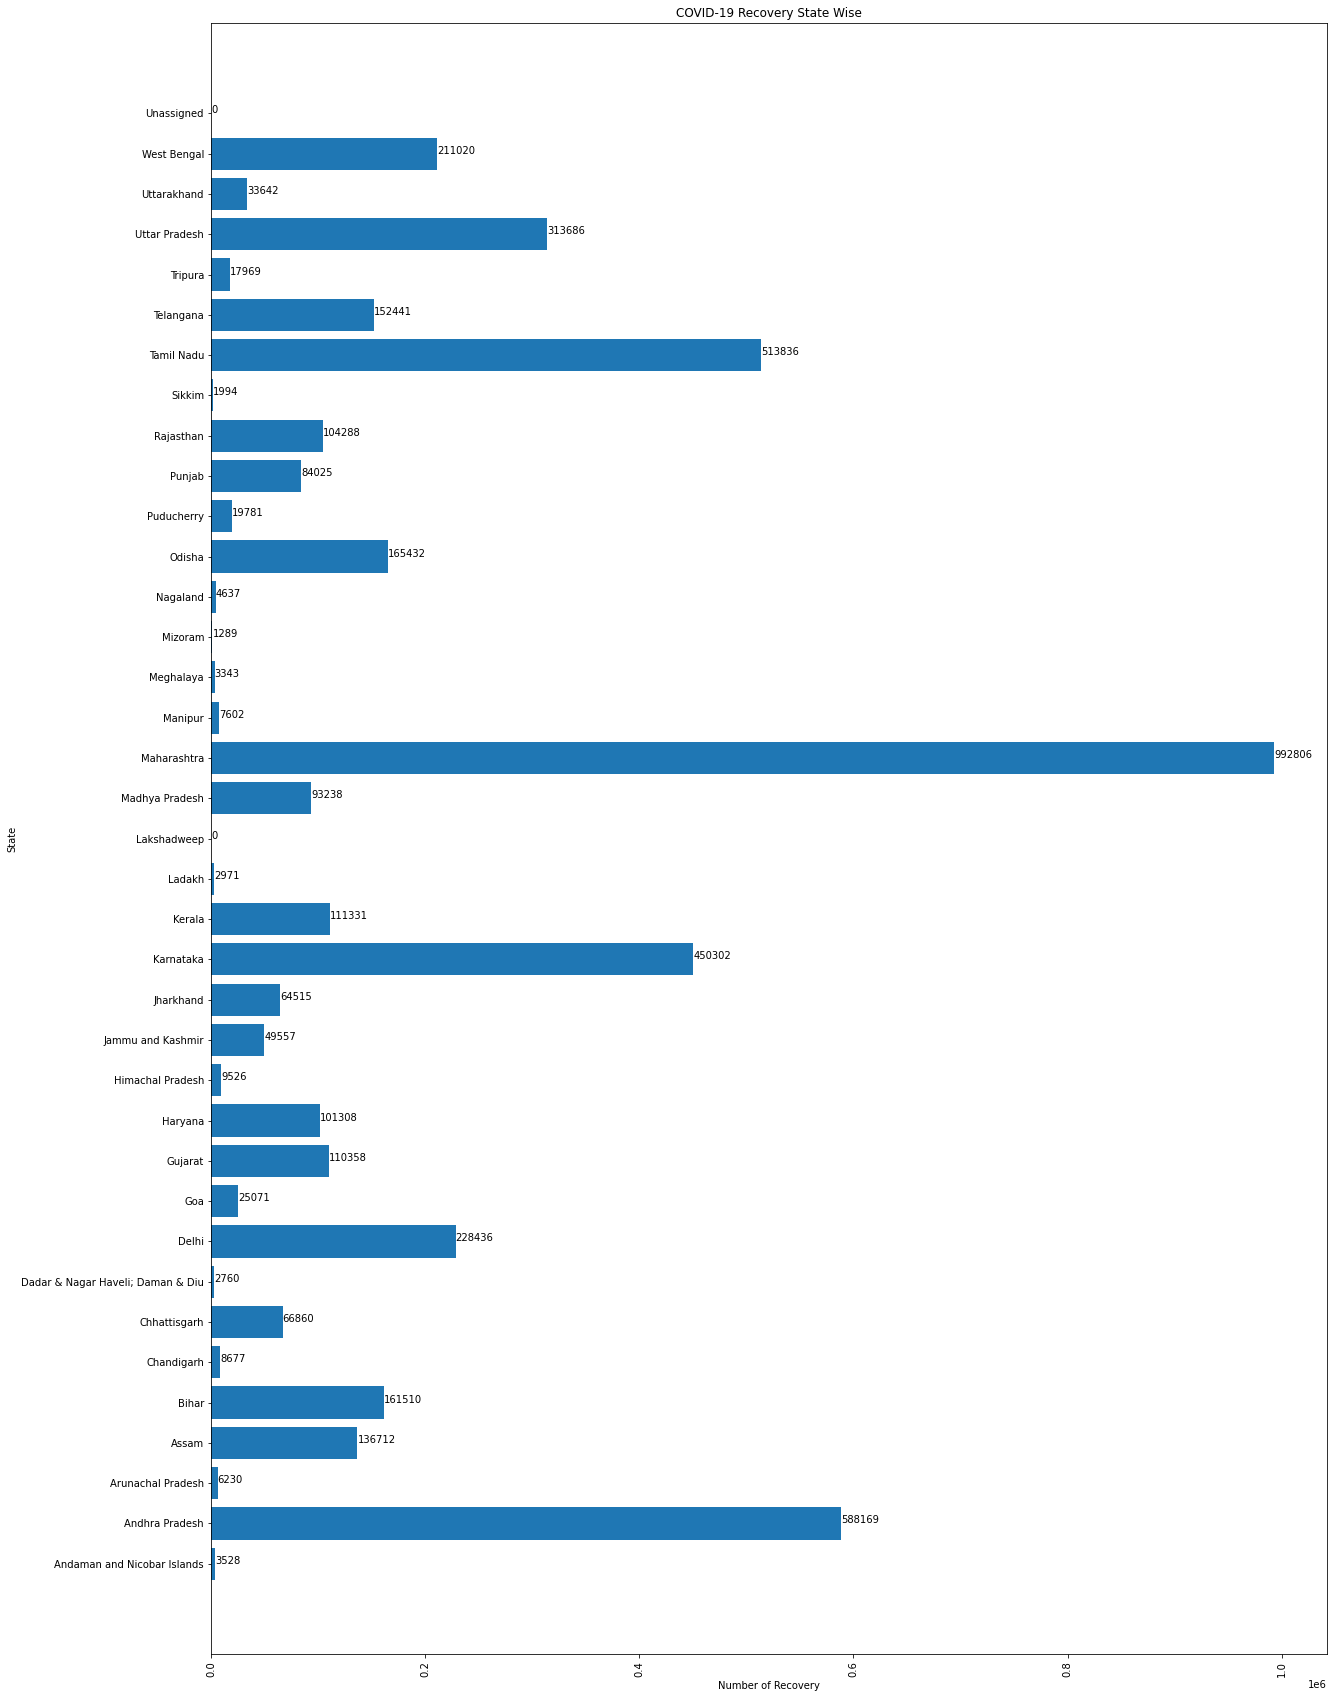

In [74]:
r = list()
for i in covid['Recovered']:
  r.append(i)
  
plt.figure(figsize = (20, 30))
plt.barh(y=covid['State'], 
        width=covid['Recovered'])
plt.xticks(rotation=90)
plt.xlabel('Number of Recovery')
plt.ylabel('State')
plt.title('COVID-19 Recovery State Wise')
for index, value in enumerate(r):
    plt.text(value, index, str(value))
plt.show()

### Bar graph of number of people died

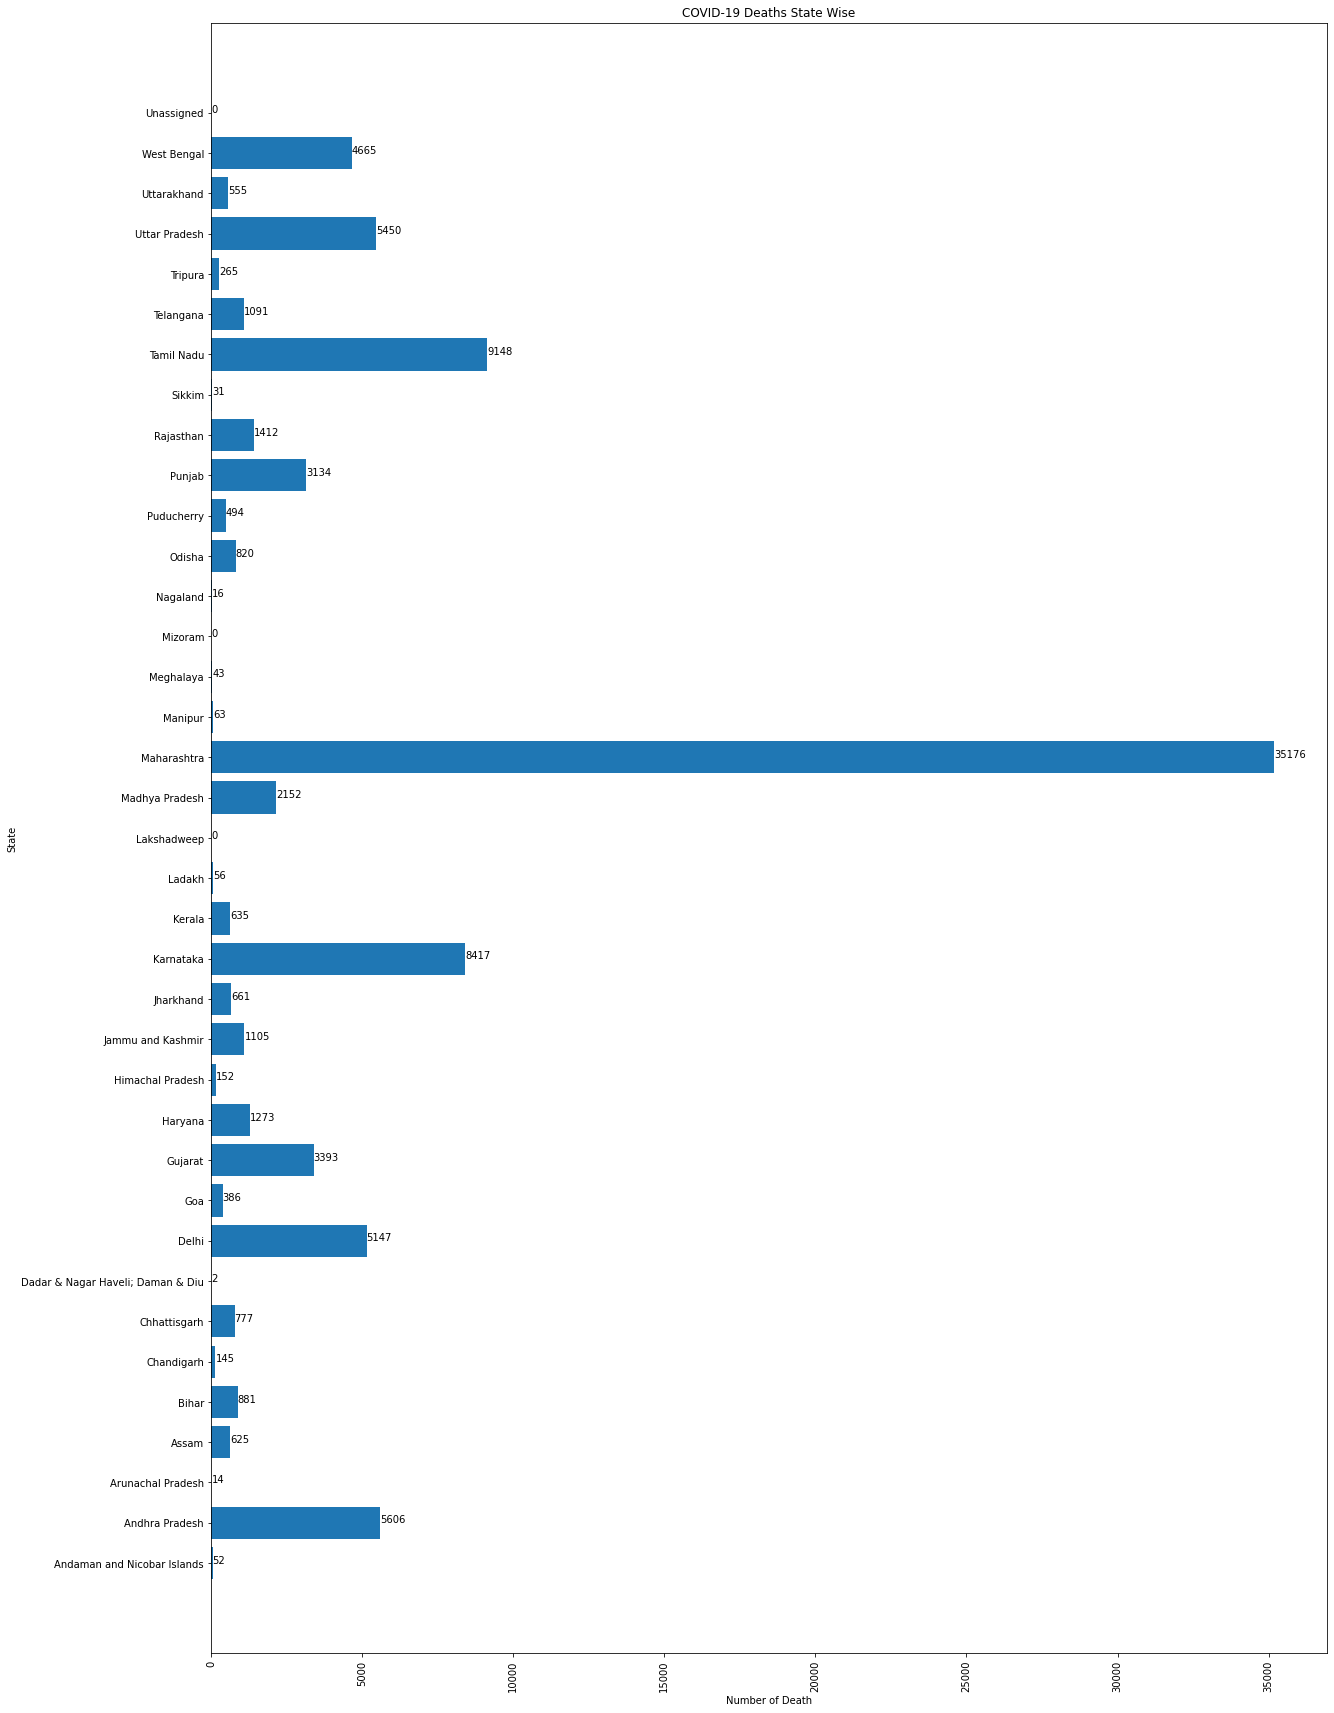

In [75]:
r = list()
for i in covid['Death']:
  r.append(i)
  
plt.figure(figsize = (20, 30))
plt.barh(y=covid['State'], 
        width=covid['Death'])
plt.xticks(rotation=90)
plt.xlabel('Number of Death')
plt.ylabel('State')
plt.title('COVID-19 Deaths State Wise')
for index, value in enumerate(r):
    plt.text(value, index, str(value))
plt.show()